LOADING DATA FROM EXCEL FILE TO PYTHON

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\velpula smaran\OneDrive\Desktop\project1\financial_data.xlsx"

# Read Excel file and list sheets
xls = pd.ExcelFile(file_path)
print("Available Sheets:", xls.sheet_names)

# Load using exact names from xls.sheet_names
df_remitter = pd.read_excel(file_path, sheet_name="UPI Remitter Members", skiprows=1)
df_state = pd.read_excel(file_path, sheet_name="State-wise UPI Product Statisti", skiprows=2) 
df_psp = pd.read_excel(file_path, sheet_name="UPI Payer PSP Performance", skiprows=2)
df_psp.dropna(how="all", inplace=True)
df_merchant = pd.read_excel(file_path, sheet_name="UPI Merchant Category-wise", skiprows=1)

print("Data loaded successfully!")


Available Sheets: ['UPI Remitter Members', 'UPI Beneficiary Members - Top 5', 'State-wise UPI Product Statisti', 'UPI Payer PSP Performance', 'UPI Merchant Category-wise']
Data loaded successfully!


CLEANING REMITTER DATA

In [21]:
df_remitter.columns = ["sr_no", "bank_name", "total_txns_mn", "approved_pct", "bd_pct", "td_pct",
                       "debit_rev_count_mn", "debit_rev_success_pct"]
df_remitter.dropna(subset=["bank_name"], inplace=True)
df_remitter["approved_txns_mn"] = df_remitter["total_txns_mn"] * df_remitter["approved_pct"]
df_remitter["failed_txns_mn"] = df_remitter["total_txns_mn"] - df_remitter["approved_txns_mn"]
df_remitter["failure_rate"] = df_remitter["failed_txns_mn"] / df_remitter["total_txns_mn"]


Clean PSP Data

In [61]:
# Remove summary/footer rows before numeric conversion
df_psp = df_psp[~df_psp["total_txns_mn"].astype(str).str.contains("Total", case=False, na=False)]

# Clean numbers
df_psp["total_txns_mn"] = (
    df_psp["total_txns_mn"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)

df_psp["approved_pct"] = (
    df_psp["approved_pct"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.strip()
    .astype(float) / 100
)

# Calculate failure rate
df_psp["approved_txns_mn"] = df_psp["total_txns_mn"] * df_psp["approved_pct"]
df_psp["failed_txns_mn"] = df_psp["total_txns_mn"] - df_psp["approved_txns_mn"]
df_psp["failure_rate"] = df_psp["failed_txns_mn"] / df_psp["total_txns_mn"]


In [ ]:
CLEANING STATE DATA

In [29]:
df_state.columns = ["sr_no", "state_name", "volume_mn", "volume_pct", "value_cr", "value_pct"]
df_state.dropna(subset=["state_name"], inplace=True)


CLEANING MERCHANT DATA

In [31]:
df_merchant.columns = ["sr_no", "mcc_code", "description", "volume_mn", "value_cr"]
df_merchant.dropna(subset=["description"], inplace=True)

Save cleaned data

In [65]:
df_remitter.to_csv(r"C:\Users\velpula smaran\OneDrive\Desktop\project1\cleaned_upi_remitter.csv", index=False)
df_psp.to_csv(r"C:\Users\velpula smaran\OneDrive\Desktop\project1\cleaned_upi_psp.csv", index=False)
df_state.to_csv(r"C:\Users\velpula smaran\OneDrive\Desktop\project1\cleaned_upi_state.csv", index=False)
df_merchant.to_csv(r"C:\Users\velpula smaran\OneDrive\Desktop\project1\cleaned_upi_merchant.csv", index=False)

print("✅ Cleaned CSVs saved successfully!")

✅ Cleaned CSVs saved successfully!


In [37]:
print(df_remitter)

    sr_no                             bank_name  total_txns_mn  approved_pct  \
0       1                   State Bank of India        5214.74        0.9322   
1       2                        HDFC Bank Ltd.        1543.98        0.9516   
2       3                        Bank of Baroda        1328.01        0.9070   
3       4                   Union Bank of India        1200.25        0.9281   
4       5                  Punjab National Bank        1106.80        0.9141   
5       6                   Kotak Mahindra Bank         960.38        0.9229   
6       7                           Canara Bank         942.67        0.9265   
7       8                        Axis Bank Ltd.         875.50        0.9464   
8       9                       ICICI Bank Ltd.         735.99        0.9608   
9      10      India Post Payments Bank Limited         637.61        0.8872   
10     11                           Indian Bank         631.57        0.9254   
11     12          Airtel Payments Bank 

In [39]:
print(df_psp)

      sr_no                              psp_name         total_txns_mn  \
0         1                        Axis Bank Ltd.               7234.98   
1         2                         Yes Bank Ltd.               5894.24   
2         3                       ICICI Bank Ltd.               3697.64   
3         4                        HDFC Bank Ltd.               2038.72   
4         5                   State Bank of India               1652.32   
5         6  Tri O Tech Solutions Private Limited                124.54   
6         7                                  BHIM                 99.55   
7         8                   Kotak Mahindra Bank                 67.13   
8         9          Airtel Payments Bank Limited                 22.17   
9        10     North East Small Finance Bank Ltd                 20.49   
10       11                        IDFC Bank Ltd.                 19.28   
11       12      India Post Payments Bank Limited                 18.16   
12       13              

In [41]:
print(df_state)

    sr_no                          state_name  volume_mn  volume_pct  \
0       1                         MAHARASHTRA    1905.45    0.000979   
1       2                           KARNATAKA    1067.74    0.000548   
2       3                       UTTAR PRADESH    1031.94    0.000530   
3       4                           TELANGANA     791.46    0.000407   
4       5                          TAMIL NADU     778.83    0.000400   
5       6                      ANDHRA PRADESH     535.33    0.000275   
6       7                           RAJASTHAN     527.21    0.000271   
7       8                             GUJARAT     501.34    0.000258   
8       9                               DELHI     468.19    0.000240   
9      10                         WEST BENGAL     425.54    0.000219   
10     11                      MADHYA PRADESH     420.83    0.000216   
11     12                               BIHAR     405.54    0.000208   
12     13                             HARYANA     397.29    0.00

In [43]:
print(df_merchant)

                            sr_no mcc_code  \
0     High Transacting Categories     5411   
1                             NaN     5814   
2                             NaN     5812   
3                             NaN     4814   
4                             NaN     5541   
5                             NaN     5816   
6                             NaN     5993   
7                             NaN     5462   
8                             NaN     5912   
9                             NaN     4900   
10  Medium Transacting Categories     5451   
11                            NaN     7322   
12                            NaN     5921   
13                            NaN     5441   
14                            NaN     5422   
15                            NaN     9399   
16                            NaN     5262   
17                            NaN     5813   
18                            NaN     5691   
19                            NaN     5412   
20           All Other Categories 

In [ ]:
DATA VISUALIZATION

---- Analysis: Top 10 Banks by Failure Rate ----

C:\Users\velpula smaran\AppData\Local\Temp\ipykernel_25604\2732252925.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="failure_rate", y="bank_name", data=top_fail_banks, palette="coolwarm")


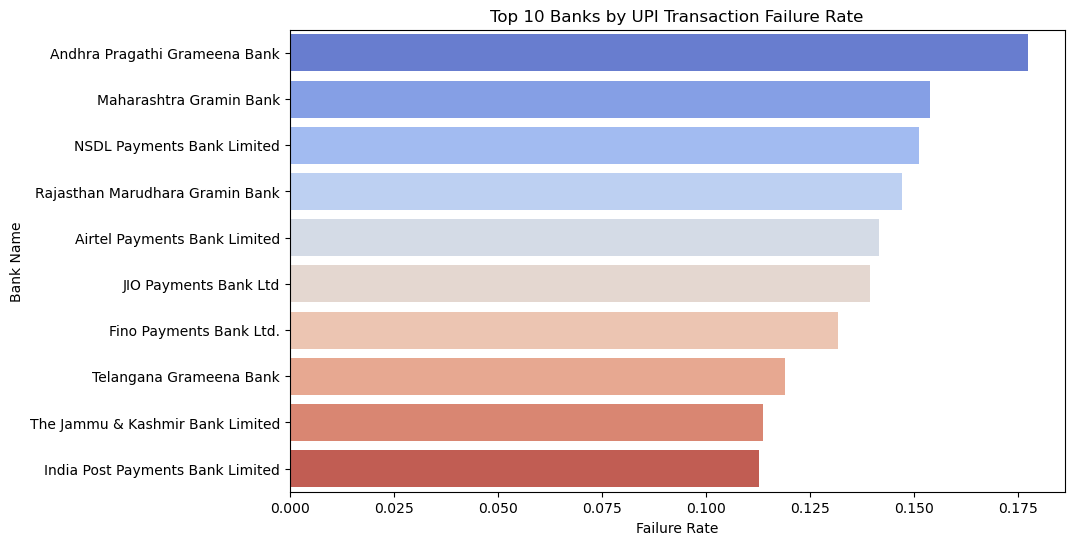

In [47]:
top_fail_banks = df_remitter.sort_values("failure_rate", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="failure_rate", y="bank_name", data=top_fail_banks, palette="coolwarm")
plt.title("Top 10 Banks by UPI Transaction Failure Rate")
plt.xlabel("Failure Rate")
plt.ylabel("Bank Name")
plt.show()


---- Analysis: PSP Failure Comparison ----

C:\Users\velpula smaran\AppData\Local\Temp\ipykernel_25604\676110109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="failure_rate", y="psp_name", data=df_psp.sort_values("failure_rate", ascending=False).head(10), palette="Oranges_r")


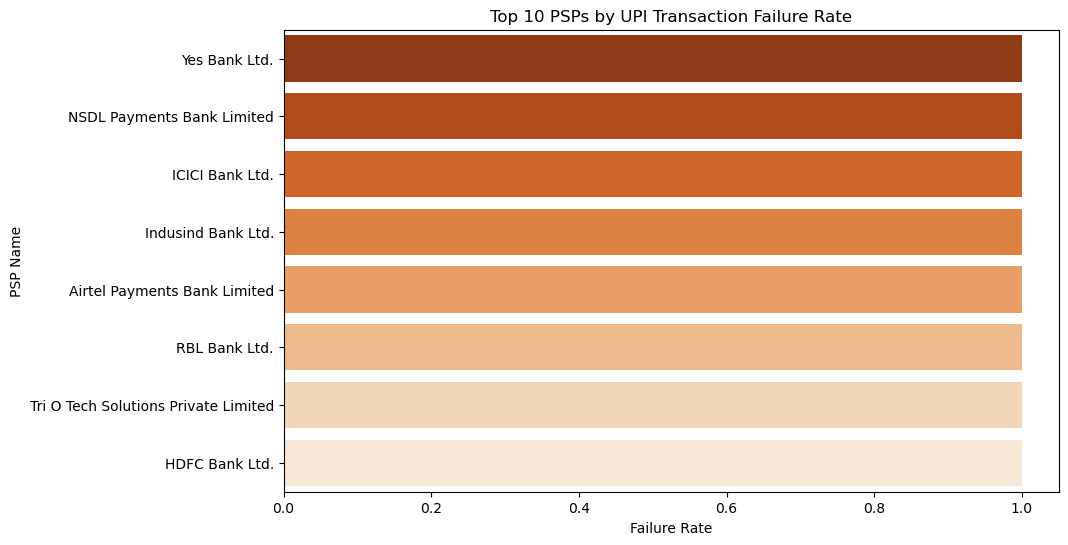

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x="failure_rate", y="psp_name", data=df_psp.sort_values("failure_rate", ascending=False).head(10), palette="Oranges_r")
plt.title("Top 10 PSPs by UPI Transaction Failure Rate")
plt.xlabel("Failure Rate")
plt.ylabel("PSP Name")
plt.show()